In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torch.optim as optim

In [ ]:

class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, num_classes):
        super(NeuralNet, self).__init__()

        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, num_classes)

    def forward(self, x):
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        return x


In [ ]:
def accuracy_fn(y_true, y_pred):
    y_pred_classes = y_pred.argmax(dim=1)
    correct_predictions = (y_pred_classes == y_true).sum().item()
    accuracy = correct_predictions / y_true.size(0)
    return accuracy

In [ ]:
batch_size = 64
input_size = 784
hidden_size1 = 128
hidden_size2 = 64
num_classes = 10

In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

In [ ]:
train_dataset = torchvision.datasets.FashionMNIST(root='./data', train=True, transform=transform, download=True)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = torchvision.datasets.FashionMNIST(root='./data', train=False, transform=transform, download=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
model = NeuralNet(input_size, hidden_size1, hidden_size2, num_classes)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [ ]:
train_accuracies = []
test_accuracies = []
train_losses = []
test_losses = []

num_epochs = 5
print_interval = 200
for epoch in range(num_epochs):
    model.train()
    total_loss = 0.0
    correct_train = 0
    total_train = 0

    for batch_idx, (batch_images, batch_labels) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = model(batch_images)
        loss = criterion(outputs, batch_labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        total_train += batch_labels.size(0)
        correct_train += (predicted == batch_labels).sum().item()

        if (batch_idx + 1) % print_interval == 0:
            batch_acc = correct_train / total_train
            print(f"Epoch [{epoch+1}/{num_epochs}], Batch [{batch_idx+1}/{len(train_loader)}], Loss: {loss.item():.4f}, Acc: {batch_acc:.4f}")

    epoch_train_acc = correct_train / total_train
    train_accuracies.append(epoch_train_acc)
    avg_train_loss = total_loss / len(train_loader)
    train_losses.append(avg_train_loss)

    model.eval()
    test_acc = 0.0
    test_loss = 0.0
    total_samples = 0

    with torch.no_grad():
        for test_images, test_labels in test_loader:
            test_outputs = model(test_images)
            test_acc += accuracy_fn(test_labels, test_outputs)
            test_loss += criterion(test_outputs, test_labels).item()
            total_samples += test_labels.size(0)

    epoch_test_acc = test_acc / len(test_loader)
    test_accuracies.append(epoch_test_acc)
    avg_test_loss = test_loss / len(test_loader)
    test_losses.append(avg_test_loss)

    print(f"Epoch [{epoch+1}/{num_epochs}], Test Accuracy: {epoch_test_acc:.4f}\n")



Epoch [1/5], Batch [200/938], Loss: 0.6830, Acc: 0.7530
Epoch [1/5], Batch [400/938], Loss: 0.4611, Acc: 0.7828
Epoch [1/5], Batch [600/938], Loss: 0.4831, Acc: 0.7971
Epoch [1/5], Batch [800/938], Loss: 0.5024, Acc: 0.8049
Epoch [1/5], Test Accuracy: 0.8111

Epoch [2/5], Batch [200/938], Loss: 0.3009, Acc: 0.8355
Epoch [2/5], Batch [400/938], Loss: 0.4520, Acc: 0.8365
Epoch [2/5], Batch [600/938], Loss: 0.7447, Acc: 0.8361
Epoch [2/5], Batch [800/938], Loss: 0.4117, Acc: 0.8370
Epoch [2/5], Test Accuracy: 0.8309

Epoch [3/5], Batch [200/938], Loss: 0.5085, Acc: 0.8416
Epoch [3/5], Batch [400/938], Loss: 0.5519, Acc: 0.8413
Epoch [3/5], Batch [600/938], Loss: 0.4188, Acc: 0.8441
Epoch [3/5], Batch [800/938], Loss: 0.3765, Acc: 0.8433
Epoch [3/5], Test Accuracy: 0.8272

Epoch [4/5], Batch [200/938], Loss: 0.3070, Acc: 0.8487
Epoch [4/5], Batch [400/938], Loss: 0.4357, Acc: 0.8414
Epoch [4/5], Batch [600/938], Loss: 0.5501, Acc: 0.8432
Epoch [4/5], Batch [800/938], Loss: 0.6246, Acc: 0.8

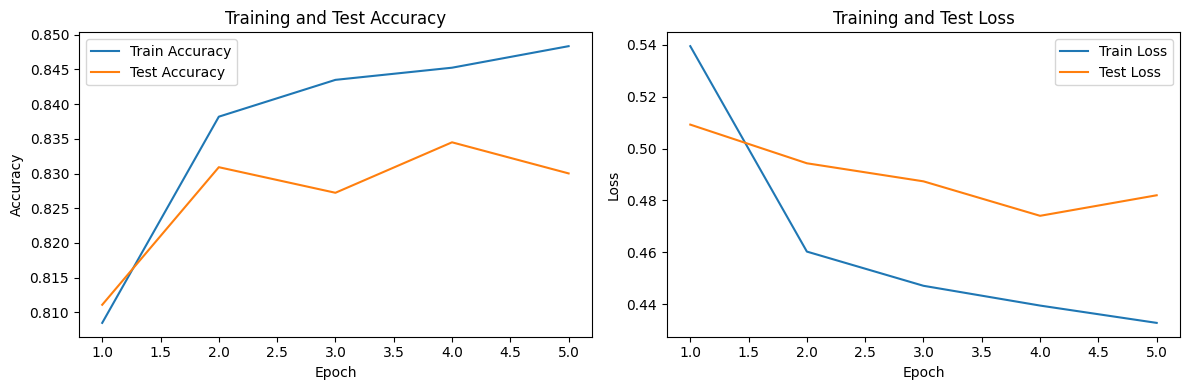

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs+1), train_accuracies, label='Train Accuracy')
plt.plot(range(1, num_epochs+1), test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs+1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs+1), test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss')
plt.legend()

plt.tight_layout()
plt.show()

 ## Feed Forward Neural Network (FFNN)


In [ ]:
class FFNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(FFNN, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        x = self.flatten(x)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [ ]:
input_size = 28 * 28
hidden_size = 128
num_classes = 10

In [ ]:
model = FFNN(input_size, hidden_size, num_classes)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
train_accuracies = []
test_accuracies = []
train_losses = []
test_losses = []

num_epochs = 5
print_interval = 200
for epoch in range(num_epochs):
    model.train()
    total_loss = 0.0
    correct_train = 0
    total_train = 0

    for batch_idx, (batch_images, batch_labels) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = model(batch_images)
        loss = criterion(outputs, batch_labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        total_train += batch_labels.size(0)
        correct_train += (predicted == batch_labels).sum().item()

        if (batch_idx + 1) % print_interval == 0:
            batch_acc = correct_train / total_train
            print(f"Epoch [{epoch+1}/{num_epochs}], Batch [{batch_idx+1}/{len(train_loader)}], Loss: {loss.item():.4f}, Acc: {batch_acc:.4f}")

    epoch_train_acc = correct_train / total_train
    train_accuracies.append(epoch_train_acc)
    avg_train_loss = total_loss / len(train_loader)
    train_losses.append(avg_train_loss)

    model.eval()
    test_acc = 0.0
    test_loss = 0.0
    total_samples = 0

    with torch.no_grad():
        for test_images, test_labels in test_loader:
            test_outputs = model(test_images)
            test_acc += accuracy_fn(test_labels, test_outputs)
            test_loss += criterion(test_outputs, test_labels).item()
            total_samples += test_labels.size(0)

    epoch_test_acc = test_acc / len(test_loader)
    test_accuracies.append(epoch_test_acc)
    avg_test_loss = test_loss / len(test_loader)
    test_losses.append(avg_test_loss)

    print(f"Epoch [{epoch+1}/{num_epochs}], Test Accuracy: {epoch_test_acc:.4f}\n")



Epoch [1/5], Batch [200/938], Loss: 0.7391, Acc: 0.7558
Epoch [1/5], Batch [400/938], Loss: 0.5385, Acc: 0.7898
Epoch [1/5], Batch [600/938], Loss: 0.5252, Acc: 0.8043
Epoch [1/5], Batch [800/938], Loss: 0.4041, Acc: 0.8150
Epoch [1/5], Test Accuracy: 0.8451

Epoch [2/5], Batch [200/938], Loss: 0.2390, Acc: 0.8580
Epoch [2/5], Batch [400/938], Loss: 0.4220, Acc: 0.8583
Epoch [2/5], Batch [600/938], Loss: 0.4530, Acc: 0.8590
Epoch [2/5], Batch [800/938], Loss: 0.3390, Acc: 0.8586
Epoch [2/5], Test Accuracy: 0.8579

Epoch [3/5], Batch [200/938], Loss: 0.5058, Acc: 0.8695
Epoch [3/5], Batch [400/938], Loss: 0.4039, Acc: 0.8724
Epoch [3/5], Batch [600/938], Loss: 0.2190, Acc: 0.8724
Epoch [3/5], Batch [800/938], Loss: 0.2317, Acc: 0.8724
Epoch [3/5], Test Accuracy: 0.8497

Epoch [4/5], Batch [200/938], Loss: 0.2758, Acc: 0.8825
Epoch [4/5], Batch [400/938], Loss: 0.1753, Acc: 0.8837
Epoch [4/5], Batch [600/938], Loss: 0.4097, Acc: 0.8828
Epoch [4/5], Batch [800/938], Loss: 0.4012, Acc: 0.8

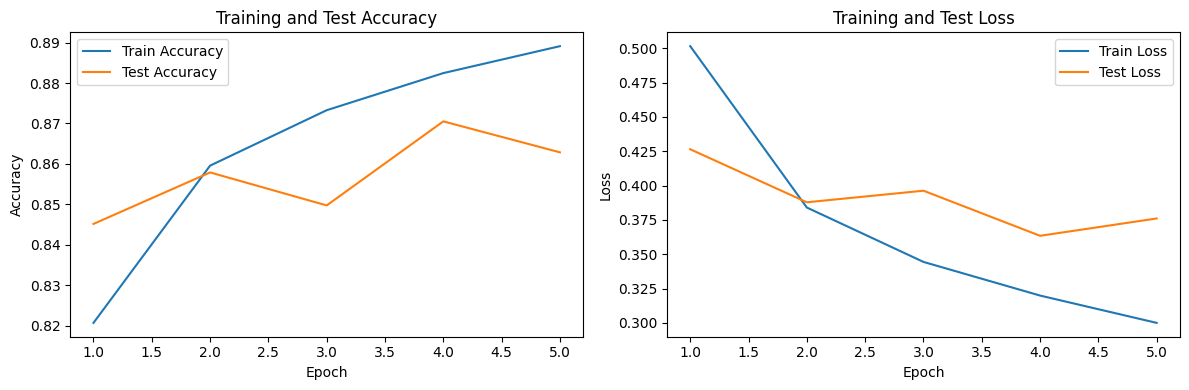

In [ ]:

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs+1), train_accuracies, label='Train Accuracy')
plt.plot(range(1, num_epochs+1), test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs+1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs+1), test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss')
plt.legend()

plt.tight_layout()
plt.show()